1. [Data exploration](#data_exploration)
2. [Events per user](#events_per_user)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
users = pd.read_csv('timeseries_users.csv')
users.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [3]:
events = pd.read_csv('timeseries_events.csv')

events.index = pd.to_datetime(events['event_date'], format='%Y-%m-%d %H:%M:%S')
del events['event_date']
events.tail()


,user_id
event_date,
2015-02-24,96
2015-02-08,96
2015-04-06,96
2015-04-08,96
2015-03-23,96


<a id='data_exploration'></a>
## Data exploration

In [4]:
users.describe()

,age,user_id
count,96.000000,96.000000
mean,41.635417,55.250000
std,10.205385,48.984423
min,24.000000,0.000000
25%,33.000000,23.750000
50%,41.000000,47.500000
75%,51.000000,71.250000
max,63.000000,227.000000


User's age mean is from 24 to 63 years old, with a mean of 41 years old.

In [5]:
# 2. Check for NaNs:
print(users.isnull().values.any())
print(events.isnull().values.any())

False
False


In [6]:
# 3. Check for duplicated entries
users_duplicated = users[users.duplicated() == True ]
print('Users: duplicated entries {}'.format(len(users_duplicated)))
events_duplicated = events[events.duplicated() == True ]
print('Events: duplicated entries {}'.format(len(events_duplicated)))

Users: duplicated entries 0
Events: duplicated entries 30496


Many duplicated entries are found in the events dataset.   
We could decide to drop them if needed. Here I keep them because I don't know if duplicates are valid entries of this particular dataset.   

<a id='events_per_user'></a>
## Events per user

Plot a histogram of total number of events per user for all male users who are 30+ years old.

In [7]:
# 1. count all events for each user:
events_per_user = events.groupby('user_id').size()
events_per_user.head()

# Select only 30+ male users:
for user_id in events_per_user.index:
    if user_id in users['user_id'].values:
        user = users[ users['user_id'] ==user_id]
        age = user['age'].values[0]
        gender = user['gender'].values[0]
    
        if ( age < 30 ) or (gender == 'f'):
            del events_per_user[user_id]
    else:
        del events_per_user[user_id]


In [8]:
print(type(events_per_user))
events_per_user.values

<class 'pandas.core.series.Series'>


array([ 126,   65, 1705,  147,  254,  129,  271,   51,  391,   10,  758,
        473,  208,   17,  224,  100,   95,  123,  349,   41, 1947,  278])

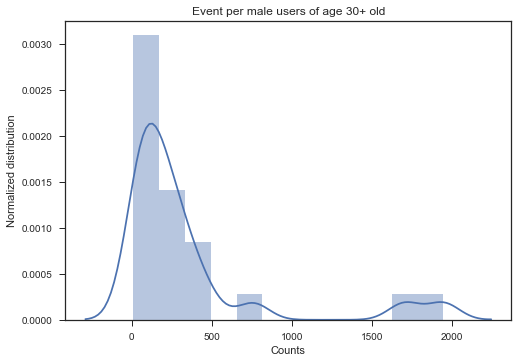

In [9]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
ax = sns.distplot(events_per_user.values)

ax.set_title('Event per male users of age 30+ old')
ax.set_ylabel('Normalized distribution')
ax.set_xlabel('Counts')

<a id = 'inter_events'></a>
## Inter events
For each user, compute the list of inter-event intervals in days. An inter-event interval is the period of time between an event and the one directly before it in time for the same user. Once you have a list of all the inter-event intervals across all users, plot a histogram of them below: 


In [54]:
def get_inter_events(events_per_user):
    """From a list of events for a given user, gets a list of inter time events in dates."""
    from datetime import datetime
    nanosecond_to_days=float(1.15741e-14)
    inter_times = []
    for event_index in range(1,len(events_per_user)):
        time1 = events_per_user[event_index-1]
        time2 = events_per_user[event_index]
        time_diff = time2 - time1
        # Convert from nanoseconds to days:
        time_diff = int(float(time_diff)*nanosecond_to_days) 
        inter_times.append(time_diff)
    return inter_times


# Cycle by user
inter_event_intervals=[]

for user_id in users['user_id'].values:
    # Get events for this user:
    events_per_user = events[events['user_id']==user_id].sort_index()
    events_per_user = events_per_user.index.values
    if len(events_per_user) > 1:
        inter_event_intervals_this = get_inter_events(events_per_user)
        inter_event_intervals = list(inter_event_intervals)+ list(inter_event_intervals_this)
    

In [55]:
inter_event_intervals=np.array(inter_event_intervals)
type(inter_event_intervals)

numpy.ndarray

In [59]:
print(len(inter_event_intervals))
print(inter_event_intervals.shape)

28190
(28190,)


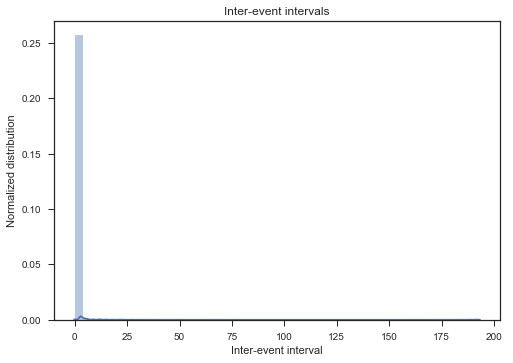

In [60]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
ax = sns.distplot(inter_event_intervals)

ax.set_title('Inter-event intervals')
ax.set_ylabel('Normalized distribution')
ax.set_xlabel('Inter-event interval (days)')

In [ ]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
ax = sns.distplot(inter_event_intervals)
ax.set_xlim(1:)
ax.set_title('Inter-event intervals')
ax.set_ylabel('Normalized distribution')
ax.set_xlabel('Inter-event interval (days)')